In [1]:
# Denoising
# In this code i used Median and Mean filters for denoising
# Median is more effective for salt and papper noise and can reduce it
# Mean smoothens the image but may blur edges as we can see in the output image

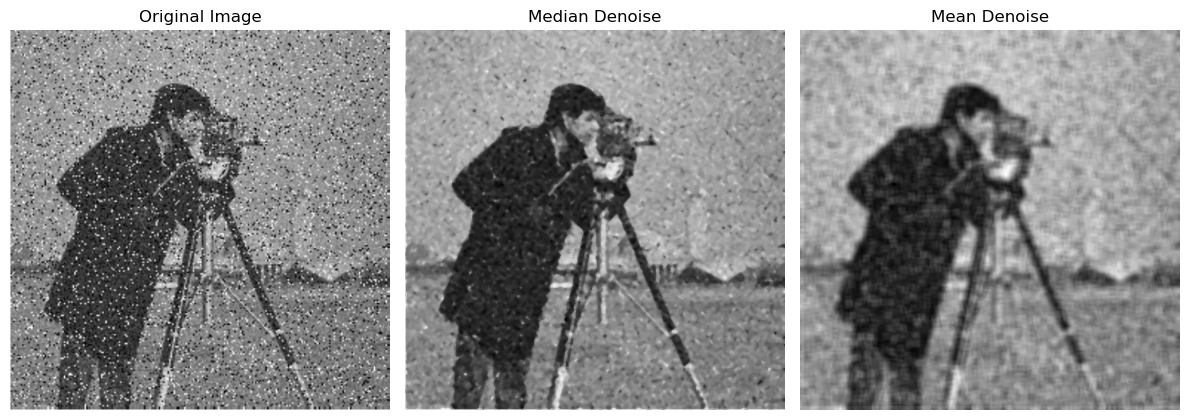

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = r"C:\Users\Abdul\Downloads\Noisy_Image.png"
originalimage = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


def median_filter(image):
    return cv2.medianBlur(image, 5)

def mean_filter(image):
    return cv2.blur(image, (9, 9))


median_filtered_image = median_filter(originalimage)
mean_filtered_image = mean_filter(originalimage)


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(originalimage, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Median Denoise")
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Mean Denoise")
plt.imshow(mean_filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
# Segmentation
# In this code, I applied Otsu's thresholding to segment the grayscale image.
# Otsu's method finds an optimal threshold to separate objects from the background.
# The segmented image highlights regions of interest based on this threshold.

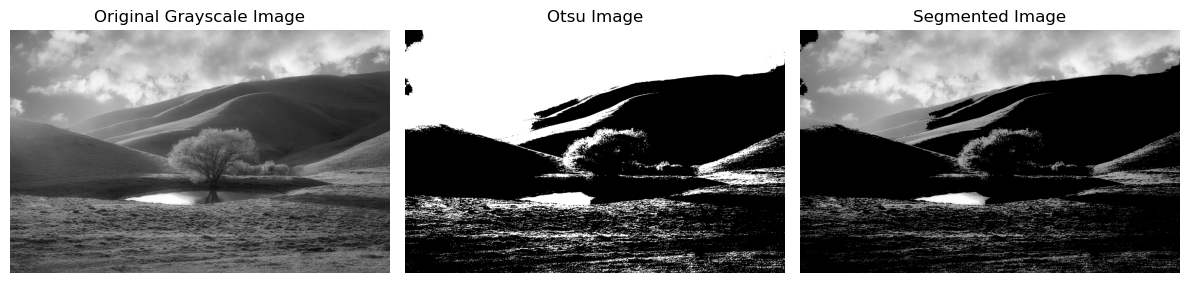

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

image_path = r"C:\Users\Abdul\Downloads\Nature.jpg"
image = io.imread(image_path, as_gray=True)

threshold_value = filters.threshold_otsu(image)
binary_mask = image > threshold_value

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Segmented Image")
plt.imshow(binary_mask * image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Otsu Image")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


In [9]:
# Morphological Operations
# This code applies various morphological operations to a binary image.
# Erosion and Dilation shrink and expand objects
# while Opening removes noise and Closing fills gaps.
# Skeletonization reduces objects to a single pixel wide skeleton.

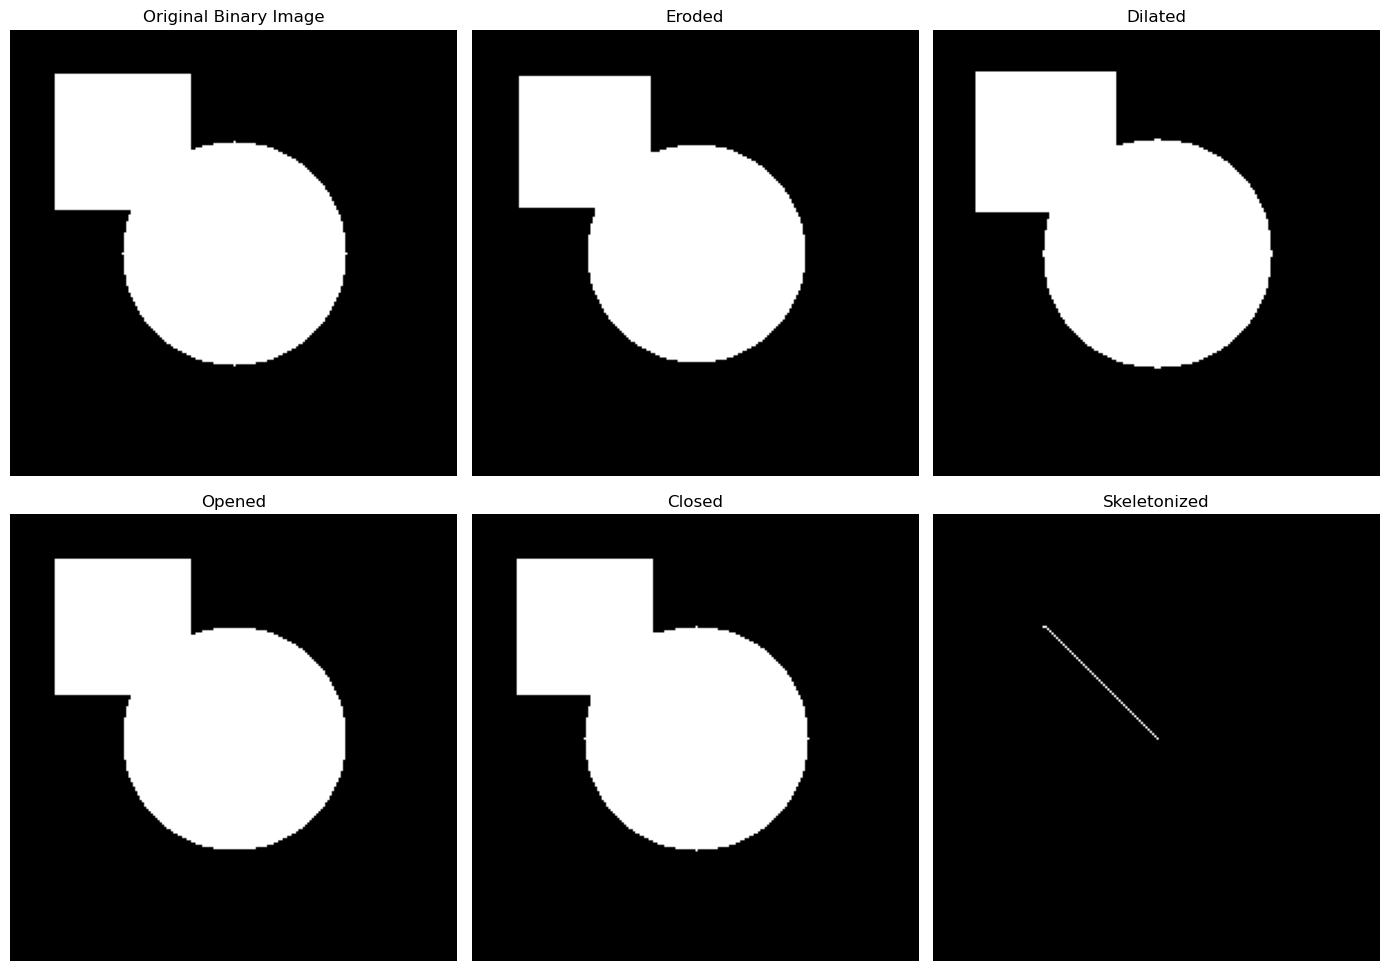

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

binary_image = np.zeros((200, 200), dtype=np.uint8)
cv2.circle(binary_image, (100, 100), 50, 255, -1)  
cv2.rectangle(binary_image, (20, 20), (80, 80), 255, -1)
binary_image[binary_image > 0] = 1

structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

eroded_image = cv2.erode(binary_image, structuring_element)

dilated_image = cv2.dilate(binary_image, structuring_element)

opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structuring_element)

closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, structuring_element)

skeleton = skeletonize(binary_image).astype(np.uint8)

plt.figure(figsize=(14, 10))

# Original Binary Image
plt.subplot(2, 3, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap="gray")
plt.axis("off")


plt.subplot(2, 3, 2)
plt.title("Eroded")
plt.imshow(eroded_image, cmap="gray")
plt.axis("off")


plt.subplot(2, 3, 3)
plt.title("Dilated")
plt.imshow(dilated_image, cmap="gray")
plt.axis("off")


plt.subplot(2, 3, 4)
plt.title("Opened")
plt.imshow(opened_image, cmap="gray")
plt.axis("off")


plt.subplot(2, 3, 5)
plt.title("Closed")
plt.imshow(closed_image, cmap="gray")
plt.axis("off")


plt.subplot(2, 3, 6)
plt.title("Skeletonized")
plt.imshow(skeleton, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
